In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy.special as sp
import pymc3 as pm

%matplotlib inline

# Poisson Distribution

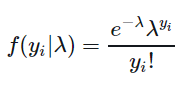

C:\Users\ameimand\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


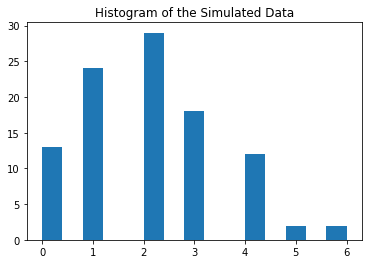

In [5]:
# We set a seed so that the results are reproducible.
np.random.seed(5)
# number of samples.
n = 100
# true parameter.
lam_true = 2
# sample array.
y = np.random.poisson(lam=lam_true, size=n)

# Histogram of the sample.
plt.hist(y, bins=15, normed=False)
plt.title('Histogram of the Simulated Data')
plt.show()

In [3]:
y

array([2, 4, 1, 0, 2, 2, 2, 2, 1, 1, 3, 2, 0, 1, 3, 3, 4, 2, 0, 0, 3, 6,
       1, 2, 1, 2, 5, 2, 3, 0, 1, 3, 1, 4, 1, 2, 4, 0, 6, 4, 1, 2, 2, 0,
       1, 2, 4, 4, 1, 3, 0, 3, 3, 2, 4, 2, 2, 1, 1, 2, 5, 2, 3, 0, 1, 1,
       1, 3, 4, 1, 3, 4, 2, 1, 2, 4, 2, 2, 1, 0, 2, 2, 3, 0, 3, 3, 4, 2,
       2, 1, 2, 1, 3, 0, 1, 0, 3, 3, 1, 2])

# Prior: Gamma Distribution

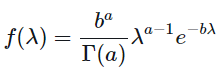

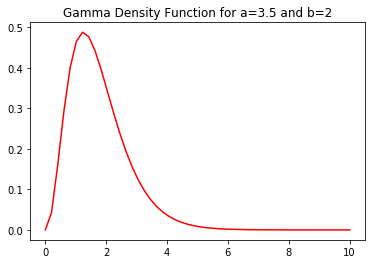

In [12]:
# Parameters of the prior gamma distribution.
a = 3.5 # shape
b = 2 # rate = 1/scale

x = np.linspace(0,10)
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.title('Gamma Density Function for a={} and b={}'.format(a,b))
plt.show()

# Define the prior distribution.
prior = lambda x: ss.gamma.pdf(x,a=a,scale=1/b)

# Likelihood

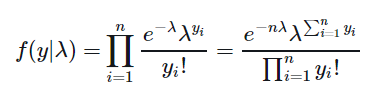

In [13]:
# Define the likelihood function.
def likelihood(lam,y):
    
    factorials = np.apply_along_axis(lambda x: sp.gamma(x+1),
                                     axis=0,
                                     arr=y)
    
    numerator = np.exp(-lam*y.size)*(lam**y.sum())
    
    denominator = np.multiply.reduce(factorials)
    
    return numerator/denominator

# Posterior distribution

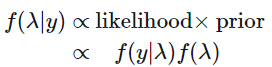

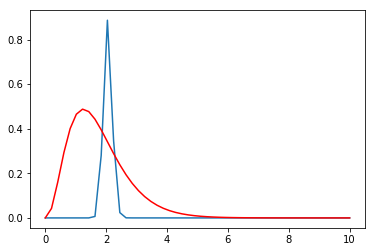

In [14]:
# Define the posterior distribution.
# (up to a constant)
def posterior_up_to_constant(lam,y):
    return likelihood(lam,y)*prior(lam)

# Plot of the prior and (scaled) posterior distribution
# for the parameter lambda.
#
# We multiply the posterior distrubution function
# by the amplitude factor 2.5e74 to make it comparable
# with the prior gamma distribution.
plt.plot(x, 2.5e74*posterior_up_to_constant(x,y))
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.show()

# PyMC3

In [15]:
model = pm.Model()

with model:
    
    # Define the prior of the parameter lambda.
    lam = pm.Gamma('lambda', alpha=a, beta=b)
    
    # Define the likelihood function.
    y_obs = pm.Poisson('y_obs', mu=lam, observed=y)
    
    # Consider 2000 draws and 3 chains.
    trace = pm.sample(draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [lambda]
Sampling 3 chains: 100%|███████████████████████████████████████████████████████| 7500/7500 [00:38<00:00, 192.72draws/s]


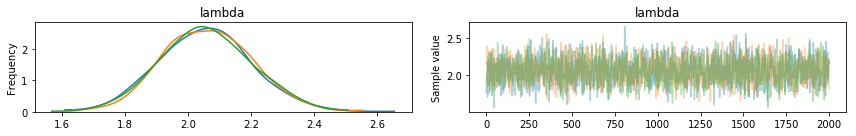

In [16]:
pm.traceplot(trace);

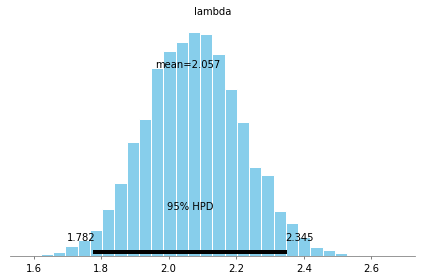

In [17]:
pm.plot_posterior(trace);